In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression

In [34]:
card_data =pd.read_csv("C:\\Users\\mm\\Desktop\\creditcard.csv")

In [35]:
card_data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [36]:
card_data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

C:\Users\mm\AppData\Local\Temp\ipykernel_2512\2517170131.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(card_data["Time"],color='red')


<Axes: xlabel='Time', ylabel='Density'>

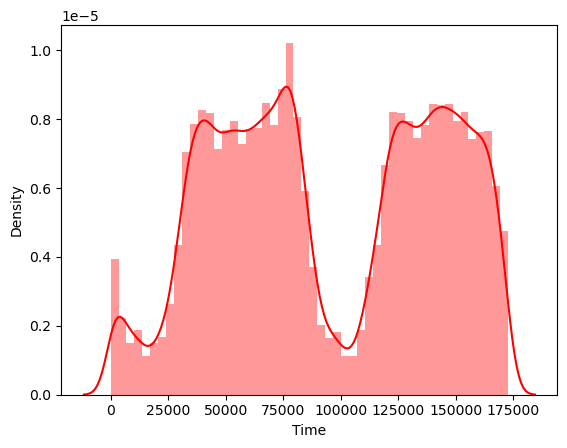

In [37]:
sns.distplot(card_data["Time"],color='red')

C:\Users\mm\AppData\Local\Temp\ipykernel_2512\4143641909.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(card_data["Amount"],color='red')


<Axes: xlabel='Amount', ylabel='Density'>

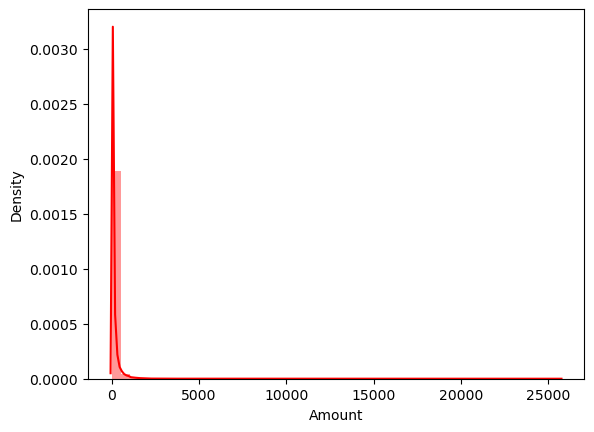

In [38]:
sns.distplot(card_data["Amount"],color='red')

<Axes: ylabel='Class'>

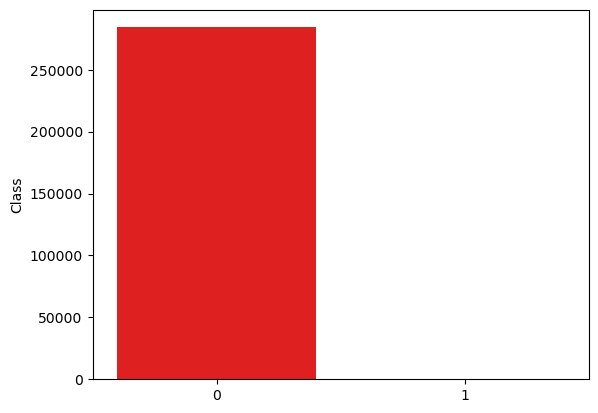

In [47]:
sns.barplot(x=card_data['Class'].value_counts().index,y=card_data['Class'].value_counts(),color='red')

<Axes: >

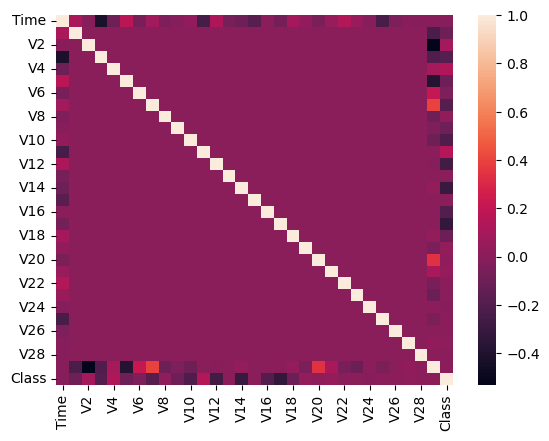

In [48]:
sns.heatmap(card_data.corr())

In [50]:
training_data=card_data.drop(columns='Class')
testing_data=card_data['Class']

In [70]:
# Split data into training, validation and test sets
x_train_val,x_test,y_train_val,y_test=train_test_split(training_data,testing_data,random_state=42,test_size=0.2,stratify=card_data['Class'])
x_train,x_val,y_train,y_val=train_test_split(x_train_val,y_train_val,test_size=0.25,random_state=42,stratify=y_train_val)
scale=StandardScaler()
scale.fit(x_train)
x_train_std=scale.transform(x_train)
x_val_std=scale.transform(x_val)
x_test_std=scale.transform(x_test)

In [71]:
RUS=RandomUnderSampler(random_state=42)
x_train_under,y_train_under=RUS.fit_resample(x_train_std,y_train)
x_val_under,y_val_under=RUS.fit_resample(x_val_std,y_val)

In [93]:
penalty=['l2']
c=np.logspace(0,4,10,100,1000)
param_grid=dict(C=c,penalty=penalty)
logistic=linear_model.LogisticRegression(solver='saga',max_iter=10000)
logistic_grid=GridSearchCV(logistic,param_grid,cv=5,scoring='roc_auc',verbose=10,n_jobs=-1)
logistic_grid.fit(x_train_under,y_train_under)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000, solver='saga'),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.15443469e+01, 4.64158883e+02, 1.00000000e+04,
       2.15443469e+05, 4.64158883e+06, 1.00000000e+08, 2.15443469e+09,
       4.64158883e+10, 1.00000000e+12]),
                         'penalty': ['l2']},
             scoring='roc_auc', verbose=10)

In [96]:
logistic_grid.score(x_train_under,y_train_under)

0.9930020109164034

In [121]:
# Define a function to find the best threshold for a given model
chart=[]
highest_f1 = 0
best_threshold = 0
best_acc = 0
best_rec = 0
best_pre = 0

for threshold in np.linspace(0, 1, 20):

    y_predict = (logistic_grid.predict_proba(x_val_under)[:, 1] >= threshold)

    f1 = f1_score(y_val_under, y_predict)
    acc = accuracy_score(y_val_under, y_predict)
    rec = recall_score(y_val_under, y_predict)
    pre = precision_score(y_val_under, y_predict)

    if f1 > highest_f1:
        best_threshold, highest_f1, best_acc, best_rec, best_pre = \
            threshold, f1, acc, rec, pre
chart=[]
chart.append(["Logistic Regression", best_threshold, highest_f1, best_acc, best_rec, best_pre])
chart = pd.DataFrame(chart, columns=['Model', 'Best Threshold', 'F1 Score', 'Accuracy', 'Recall', 'Precision'])
chart

,Model,Best Threshold,F1 Score,Accuracy,Recall,Precision
0,Logistic Regression,0.578947,0.931937,0.934343,0.89899,0.967391
